## Tugas 

Lakukanlah proses classification learning Decision Tree dengan ketentuan,

1. Menggunakan data `mushrooms.csv`
2. Evaluasi hasilnya

In [52]:
# Import library yang dibutuhakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Load dataset
mus = pd.read_csv('./dataset/mushrooms.csv')

# Inspeksi data
mus.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [54]:
# Cek Deskripsi Data
display(mus.describe())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [55]:
# Cek Informasi Data
print(mus.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [56]:
mus.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [57]:
# Label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in mus.columns:
    mus[col] = le.fit_transform(mus[col])
mus.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [58]:
X = mus.iloc[:,1:23].values
y = mus.iloc[:,0].values
y = y.reshape(len(y),1)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [60]:
from sklearn.tree import DecisionTreeClassifier


dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion='entropy')

dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

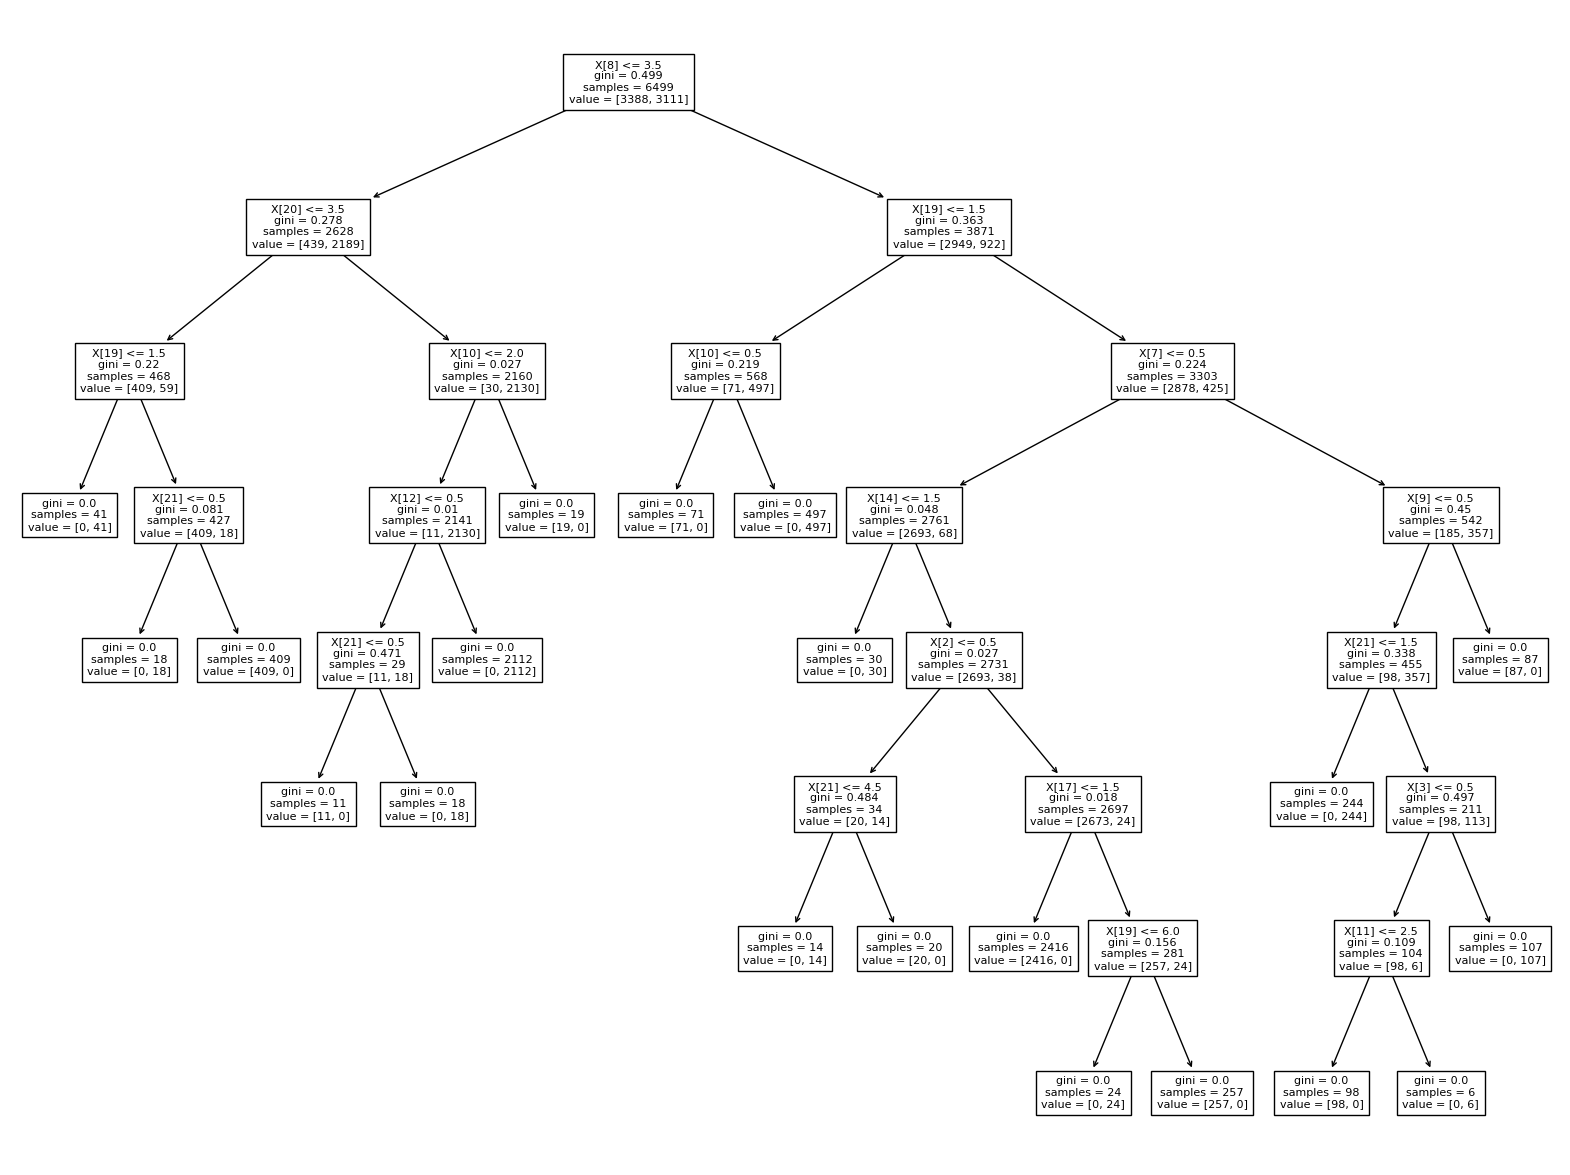

In [61]:
# Visualisasi Decision Tree
from sklearn import tree

# Set ukuran gambar
plt.figure(figsize=(20,15))

tree.plot_tree(dt1.fit(X_train, y_train), fontsize=8)
plt.show()

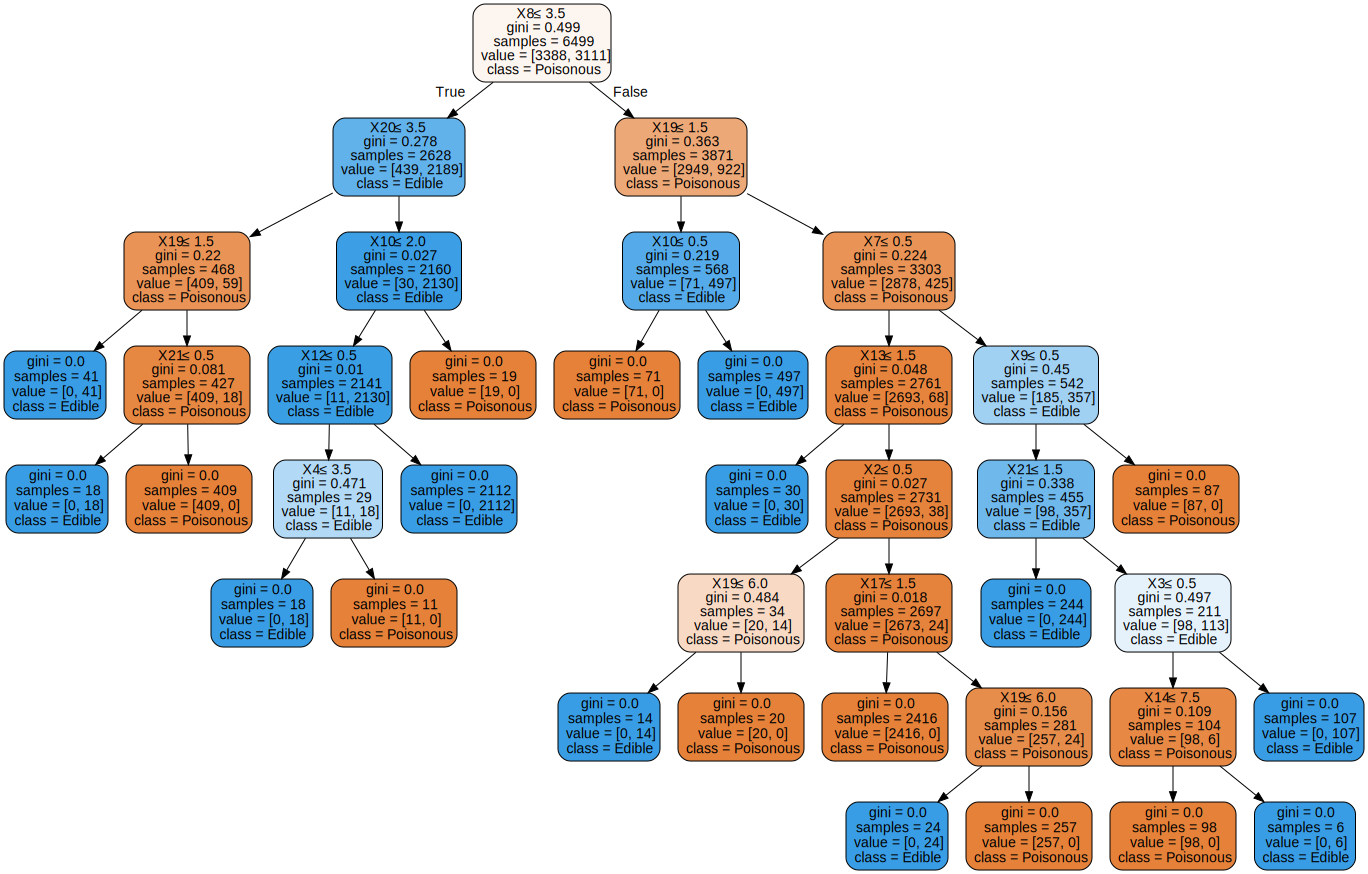

In [62]:
# Visualisasi Graphviz
import graphviz

dot_data1 = tree.export_graphviz(
    dt1.fit(X_train, y_train), 
    out_file=None,
    class_names=['Poisonous', 'Edible'],
    filled=True, rounded=True, 
    special_characters=True)
graph = graphviz.Source(dot_data1)
graph

In [63]:
# Untuk memprediksi label set test
y_pred1 = dt1.predict(X_test)
print(y_pred1[0:5])

[0 1 1 1 0]


In [64]:
def inverse_label(e):
    return 'p' if e == 1 else 'e'

res_label = np.vectorize(inverse_label)
pred_label = res_label(y_pred1[0:5])
print(pred_label)

['e' 'p' 'p' 'p' 'e']


In [65]:
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred1 = dt1.predict(X_test)
y_pred2 = dt2.predict(X_test)

com1 = accuracy_score(y_test, y_pred1)
com2 = accuracy_score(y_test, y_pred2)

print("Test set accuracy gini: {}".format(com1))
print("Test set accuracy entropy: {}".format(com2))

Test set accuracy gini: 1.0
Test set accuracy entropy: 1.0
